In [1]:
%matplotlib inline
import warnings; warnings.filterwarnings(action='ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Get tracer name list

In [2]:
with open ("strato_code/strato_Parameters.f90", "r") as f:
    code_str = f.readlines()

In [3]:
varnames = []

pattern = 'INTEGER, PARAMETER :: ind_'
for line in code_str:
    if pattern in line:
        varnames.append( line.replace(pattern,'').split()[0] )

print(len(varnames), varnames)

40 ['CH3', 'Cl2', 'Cl2O2', 'ClOO', 'OClO', 'BrCl', 'HOBr', 'BrONO2', 'HCO', 'CH3O', 'O1D', 'N2O5', 'HBr', 'CH3OOH', 'HNO4', 'HCl', 'H2O2', 'HOCl', 'HNO3', 'H', 'CH3O2', 'ClONO2', 'NO3', 'CH2O', 'Br', 'OH', 'Cl', 'ClO', 'O3', 'NO', 'BrO', 'O', 'HO2', 'NO2', 'H2O', 'H2', 'O2', 'N2', 'CH4', 'CO']


# Read data

In [4]:
df = pd.read_csv('strato_code/strato.dat',
                 delim_whitespace=True, header=None, index_col=0)
df.columns = varnames
df.index.name = 'time'

# strato example doesn't seem to print invalid format
df = df.apply(pd.to_numeric, errors='raise')
#df[np.isnan(df)] = 0.0

In [5]:
df.head()

,CH3,Cl2,Cl2O2,ClOO,OClO,BrCl,HOBr,BrONO2,HCO,CH3O,...,BrO,O,HO2,NO2,H2O,H2,O2,N2,CH4,CO
time,,,,,,,,,,,,,,,,,,,,,
0.0,3.984427e-17,8.665679e-14,7.103997e-14,2.659306e-15,7.193558e-14,5.843046e-14,5.066596e-12,9.405408e-14,3.010774e-19,2.496504e-15,...,1.132088e-11,8.158574e-09,1.439703e-10,2.758840e-09,0.000006,3.700000e-07,0.209,0.781,4.900000e-07,2.000000e-08
1.0,3.979079e-17,8.303418e-14,7.136077e-14,2.674051e-15,7.204178e-14,5.855919e-14,5.059697e-12,9.398523e-14,3.031948e-19,2.495030e-15,...,1.131221e-11,8.105665e-09,1.436213e-10,2.761086e-09,0.000006,3.700000e-07,0.209,0.781,4.900000e-07,2.000000e-08
2.0,3.903900e-17,8.301765e-14,7.221541e-14,2.652994e-15,7.309114e-14,5.939480e-14,5.062656e-12,9.575610e-14,2.988254e-19,2.451236e-15,...,1.132853e-11,7.900341e-09,1.420599e-10,2.790494e-09,0.000006,3.700000e-07,0.209,0.781,4.900000e-07,2.000000e-08
3.0,3.611122e-17,8.727553e-14,7.511070e-14,2.521919e-15,7.732210e-14,6.278307e-14,5.133926e-12,1.045820e-13,2.788575e-19,2.274840e-15,...,1.140011e-11,7.205649e-09,1.366378e-10,2.921798e-09,0.000006,3.700000e-07,0.209,0.781,4.900000e-07,2.000000e-08
4.0,2.927374e-17,1.017497e-13,8.309933e-14,2.188325e-15,8.975063e-14,7.273702e-14,5.360007e-12,1.334611e-13,2.301778e-19,1.856175e-15,...,1.156187e-11,5.652095e-09,1.233076e-10,3.304176e-09,0.000006,3.700000e-07,0.209,0.781,4.900000e-07,2.000000e-08


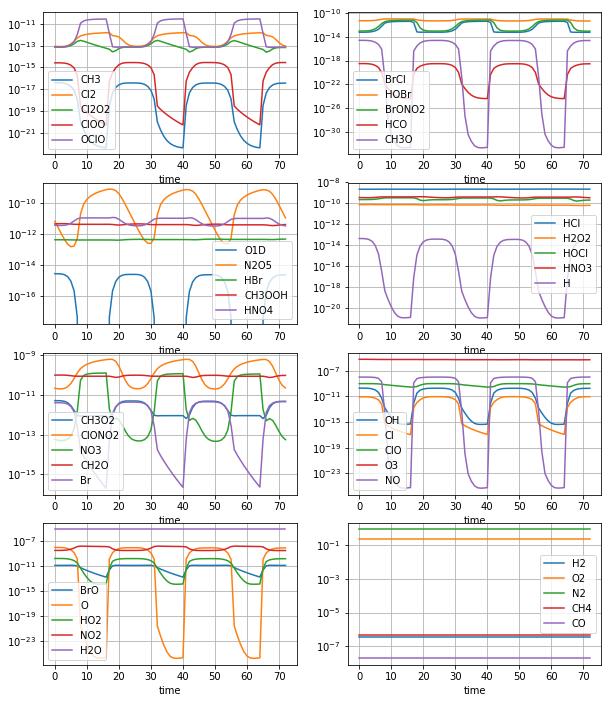

In [7]:
N_sub = 5 
N_figures = 8

fig, axes = plt.subplots(N_figures//2, 2, figsize=[10, 12])

for i in range(N_figures):
    sub_name = varnames[i*N_sub:(i+1)*N_sub]
    df.plot(y=sub_name, logy=True, grid=True, ax=axes.ravel()[i])